In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

sys.path.append('../')

from circularcoordinates import CircCoordLn, weight_ft_0, weight_ft_with_degree_meta, weighted_circular_coordinate
from dataset import noisy_conjoined

In [2]:
_ = noisy_conjoined()
data, coord_1, coord_2 = [_[el] for el in ['data', 'coord_1', 'coord_2']]
prime = 47

In [3]:
fts = [None] + [
    weight_ft_with_degree_meta(ft)
    for ft in [lambda x, y: 1 / (np.sqrt(x * y)),
               lambda x, y: 1 / (x + y)]
] + [weight_ft_0(2)]
results = [[
    weighted_circular_coordinate(data, prime=prime, cocycle_n=0, weight_ft=ft),
    weighted_circular_coordinate(data, prime=prime, cocycle_n=1, weight_ft=ft),
] for ft in tqdm(fts)]
labels = ['Original', '1/sqrt(D0 D1)', '1/(D0 + D1)', 'DGL']

 75%|███████▌  | 3/4 [00:05<00:02,  2.19s/it]

0.09903750297216461


100%|██████████| 4/4 [00:06<00:00,  1.69s/it]


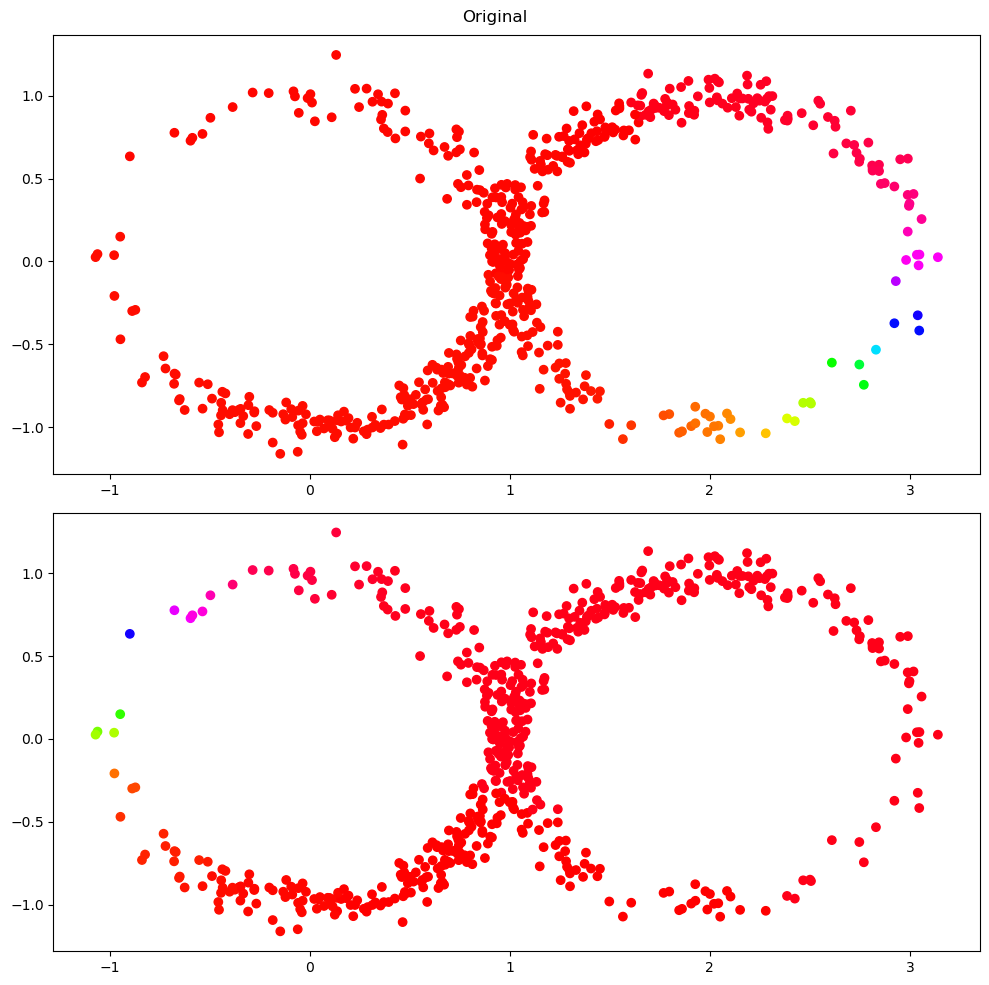

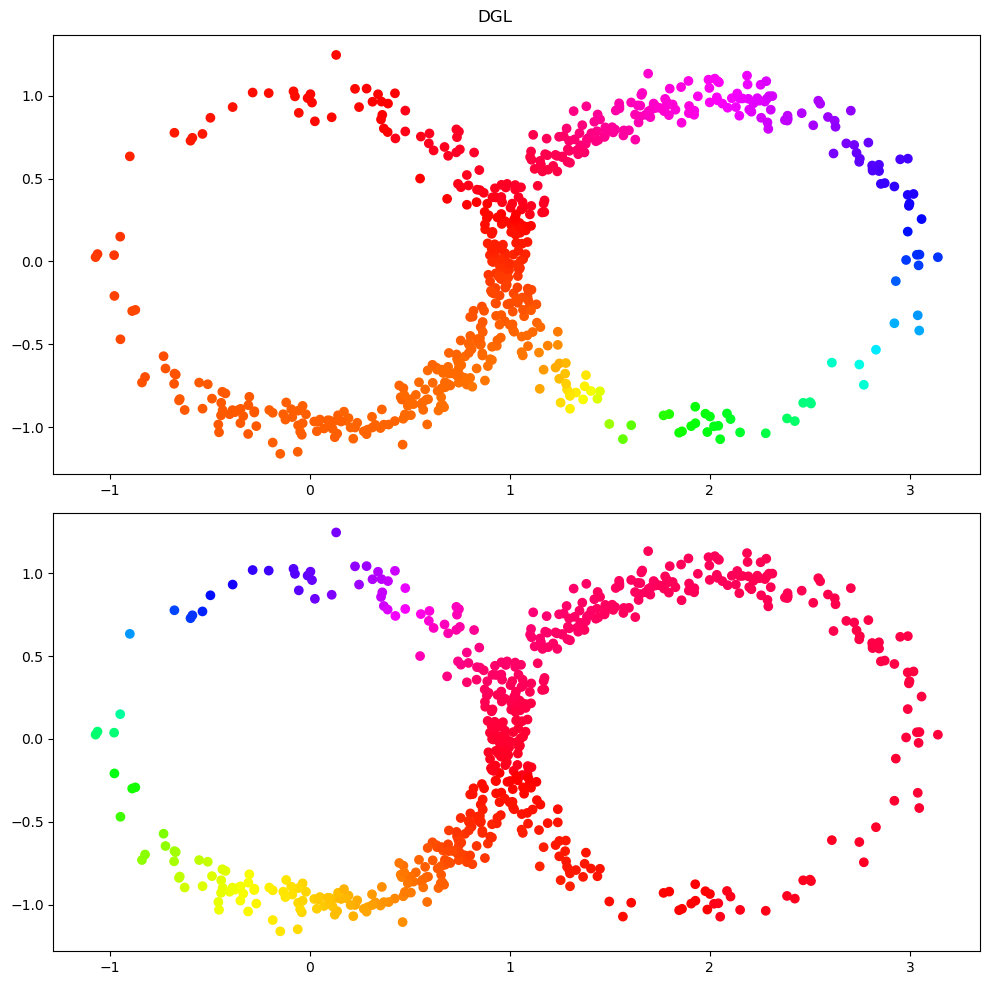

In [4]:
for i in [0, -1]:
    fig, axs = plt.subplots(2,1, figsize=(10, 10))
    axs[0].scatter(*data.T, c=results[i][0], cmap='hsv')
    axs[1].scatter(*data.T, c=results[i][1], cmap='hsv')
    plt.suptitle(labels[i])
    plt.tight_layout()
    plt.show()
    plt.close()

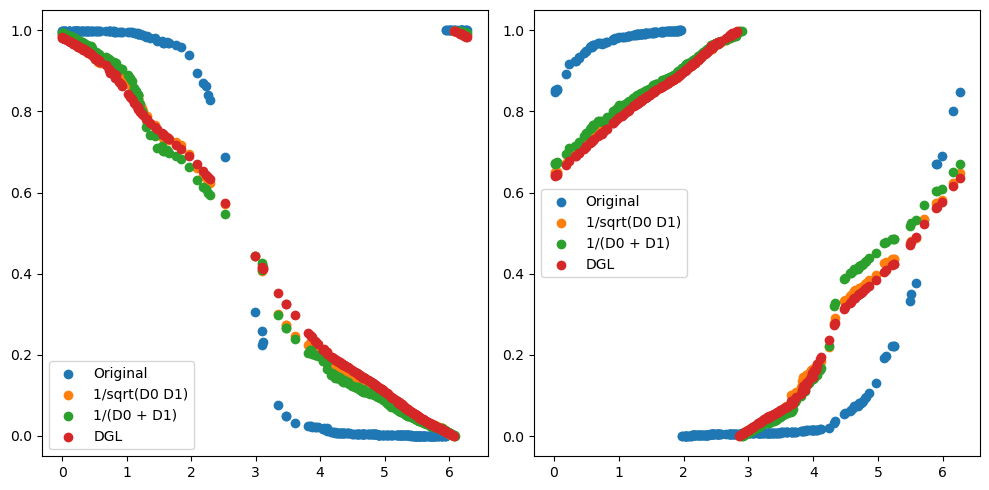

In [5]:
fig, axs = plt.subplots(1,2,figsize=(10, 5))
for result, label in zip(results, labels):
    axs[0].scatter(coord_1, result[1][:300], label=label)
axs[0].legend()
for result, label in zip(results, labels):
    axs[1].scatter(coord_2, result[0][300:], label=label)
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()

In [6]:
hyper_params = [
    {'epoch': 100, 'lr': 0.001, 'p_norm': 2},
    {'epoch': 2000, 'lr': 0.05, 'p_norm': 4},
    {'epoch': 2000, 'lr': 0.05, 'p_norm': 6},
    {'epoch': 2000, 'lr': 0.05, 'p_norm': 10},
    {'epoch': 5000, 'lr': 0.05, 'p_norm': 20},
]
ccl = CircCoordLn(data, prime=prime)
ccl.setup(0)
orig_1 = ccl.cc_original()
ccl.f_reset_L2()
lp_results_0 = []
for param in hyper_params:
    lp_results_0.append(np.mod(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0], 1.0))
lp_results_0.append(np.mod(ccl.cc_Linf_Lp(10000, 0.0001, 0.001, 20, 25)[0], 1.0))
lp_results_0 = np.asarray(lp_results_0)

ccl.setup(1)
orig_2 = ccl.cc_original()
ccl.f_reset_L2()
lp_results_1 = []
for param in hyper_params:
    lp_results_1.append(np.mod(ccl.cc_Lp(**param, delta_thr=1e-7, max_count=500)[0], 1.0))
lp_results_1.append(np.mod(ccl.cc_Linf_Lp(10000, 0.0001, 0.001, 20, 25)[0], 1.0))
lp_results_1 = np.asarray(lp_results_1)
lp_results = np.stack([lp_results_0, lp_results_1])

100%|██████████| 10000/10000 [03:25<00:00, 48.57it/s, 0.17555 / 0.17555 / p = infty]                 


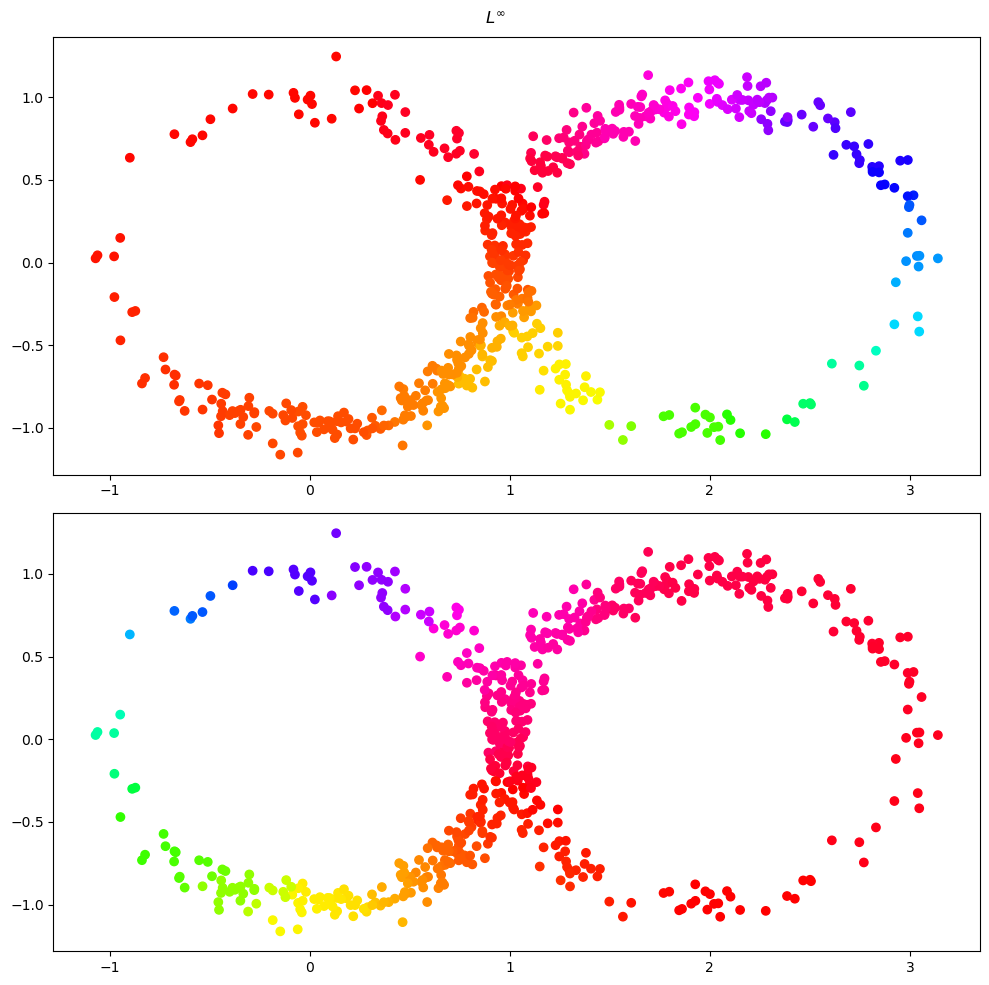

In [7]:
fig, axs = plt.subplots(2,1,figsize=(10, 10))
axs[0].scatter(*data.T, c=lp_results[0][-1], cmap='hsv')
axs[1].scatter(*data.T, c=lp_results[1][-1], cmap='hsv')
plt.suptitle('$L^\infty$')
plt.tight_layout()
plt.show()
plt.close()

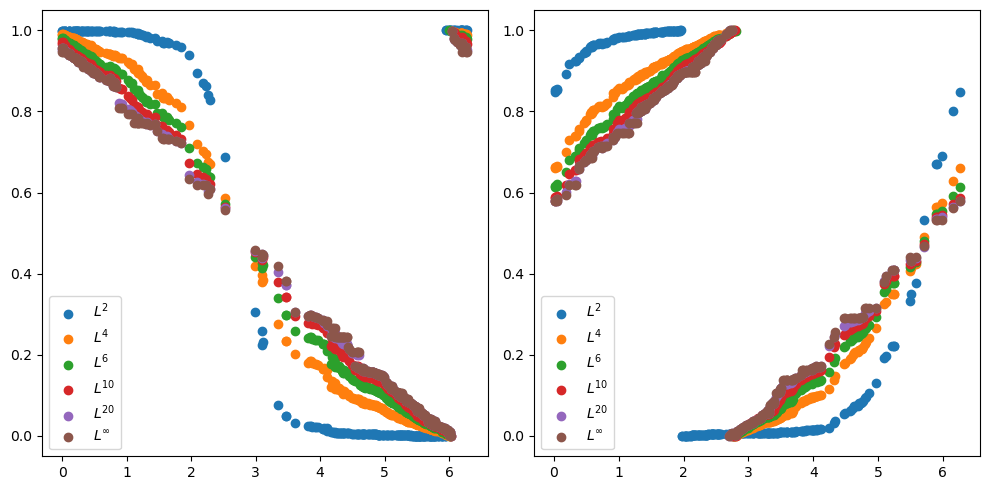

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for result, label in zip(lp_results[1], [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[0].scatter(coord_1, result[:300], label=f'$L^{label}$')
for result, label in zip(lp_results[0], [2, 4, 6, '{10}', '{20}', '\infty']):
    axs[1].scatter(coord_2, result[300:], label=f'$L^{label}$')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()

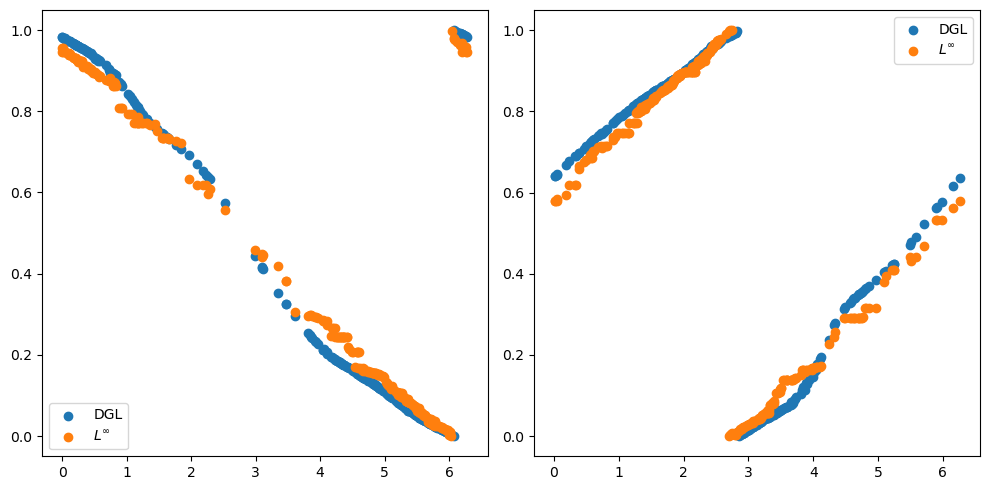

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(coord_1, results[-1][1][:300], label=labels[-1])
axs[0].scatter(coord_1, lp_results[1][-1][:300], label="$L^\infty$")
axs[1].scatter(coord_2, results[-1][0][300:], label=labels[-1])
axs[1].scatter(coord_2, lp_results[0][-1][300:], label="$L^\infty$")
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()
plt.close()